## Recommender Systems Part 2 - Matrix Factorization Visualization

In [72]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import sklearn

Loading the results of the training, as well as the dictionaries.

In [2]:
user_matrix = np.load('user_matrix.npy')
item_matrix = np.load('item_matrix.npy')
dict_user = np.load('dict_user.npy')
dict_items = np.load('dict_items.npy')

We create a dataframe from the dictionaries, we will merge them with the dataframes so that we have the matrix_id for both item_matrix and user_matrix

In [3]:
dict_user_df = pd.DataFrame(dict_user)
dict_user_df = dict_user_df.rename(columns = {0:'user_id',1:'matrix_id'})

dict_movie_df = pd.DataFrame(dict_items)
dict_movie_df = dict_movie_df.rename(columns = {0:'movie_id',1:'matrix_id'})

In [18]:
users_df = pd.read_csv('ml-1m/users.dat',
                        delimiter='::', header=None,
                        names=['user_id', 'Gender','Age','Occupation','Zip-Code'], encoding = "ISO-8859-1")

In [19]:
movies_df = pd.read_csv('ml-1m/movies.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['movie_name', 'genre'], encoding = "ISO-8859-1")
movies_df['movie_id'] = movies_df.index.to_list()

In [21]:
# movies_df.head()

Splitting the genre of the movies so that we have fewer genre classes

In [22]:
new = movies_df['genre'].str.split('\|',expand= True)
movies_df['genre_1'] = new[0]
movies_df['genre_2'] = new[1]
movies_df['genre_3'] = new[2]

Getting the year of the movie

In [23]:
new_year = movies_df['movie_name'].str.split('(',expand= True)
# movies_df['genre_1'] = new[0]
movies_df['year'] = new_year[1].str[:4]

In [24]:
movies_df

movie_name                         genre  \
1                       Toy Story (1995)   Animation|Children's|Comedy   
2                         Jumanji (1995)  Adventure|Children's|Fantasy   
3                Grumpier Old Men (1995)                Comedy|Romance   
4               Waiting to Exhale (1995)                  Comedy|Drama   
5     Father of the Bride Part II (1995)                        Comedy   
...                                  ...                           ...   
3948             Meet the Parents (2000)                        Comedy   
3949          Requiem for a Dream (2000)                         Drama   
3950                    Tigerland (2000)                         Drama   
3951             Two Family House (2000)                         Drama   
3952               Contender, The (2000)                Drama|Thriller   

      movie_id    genre_1     genre_2  genre_3  year  
1            1  Animation  Children's   Comedy  1995  
2            2  Adventure  Children's  Fantasy  1995  
3            3     Comedy     Romance     None  1995  
4            4     Comedy       Drama     None  1995  
5            5     Comedy        None     None  1995  
...        ...        ...         ...      ...   ...  
3948      3948     Comedy        None     None  2000  
3949      3949      Drama        None     None  2000  
3950      3950      Drama        None     None  2000  
3951      3951      Drama        None     None  2000  
3952      3952      Drama    Thriller     None  2000  

[3883 rows x 7 columns]

Here are implemented function for visualization of the results.

In [36]:
def plot_results_users(alg_output, users_df, by, dict_user_df, alg_label ):
    alg_df = pd.DataFrame(alg_output)
    alg_df['matrix_id']= alg_df.index.to_list()
    alg_df = alg_df.merge(dict_user_df, on = 'matrix_id')
    alg_df = alg_df.merge(users_df, on = 'user_id')
    by_list = np.unique(alg_df[by])
    df_list = []
    for param in by_list:
        df_list.append(alg_df.loc[alg_df[by] == param ])
    sc = []
    tmp_id = 0
    plt.figure(figsize=(10,10))
    for i in by_list:
        sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
        tmp_id +=1
    plt.legend(sc,by_list)
    plt.title(alg_label)
    plt.show()

This implementation gets all of the unique values of the column by which we want to plot (genre for example).

As by ploting all of the unique genres gives a very confusing result, we also implemented a function that plots just by a specific list

In [45]:
def plot_results_movies(alg_output, movies_df, by, dict_item_df, alg_label ):
    alg_df = pd.DataFrame(alg_output)
    alg_df['matrix_id']= alg_df.index.to_list()
    alg_df = alg_df.merge(dict_item_df, on = 'matrix_id')
    alg_df = alg_df.merge(movies_df, on = 'movie_id')
    by_list = np.unique(alg_df[by])
    df_list = []
    
    for param in by_list:
        df_list.append(alg_df.loc[alg_df[by] == param ])
    sc = []
    tmp_id = 0
    
    plt.figure(figsize=(20,10))
    for i in by_list:
        sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
        tmp_id +=1
        
    plt.legend(sc,by_list)
    plt.title(alg_label)
    plt.show()

In [25]:
def plot_results_movies_list(alg_output, movies_df, by, by_list, dict_item_df, alg_label ):
    alg_df = pd.DataFrame(alg_output)
    alg_df['matrix_id']= alg_df.index.to_list()
    alg_df = alg_df.merge(dict_item_df, on = 'matrix_id')
    alg_df = alg_df.merge(movies_df, on = 'movie_id')

    # by_list = ['Western', 'Animation', "Children's",
    #    'Crime', 'Documentary', 'Fantasy', 'Horror',
    #    'Musical', 'Mystery', 'Romance', 'Sci-Fi']
    
    df_list = []
    for param in by_list:
        df_list.append(alg_df.loc[alg_df[by] == param ])
        
    sc = []
    tmp_id = 0
    plt.figure(figsize=(20,10))
    for i in by_list:
        sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
        tmp_id +=1
    plt.legend(sc,by_list)
    plt.title(alg_label)
    plt.show()

In [62]:
def plot_results_users_list(alg_output, users_df, by, by_list, dict_user_df, alg_label ):
    alg_df = pd.DataFrame(alg_output)
    alg_df['matrix_id']= alg_df.index.to_list()
    alg_df = alg_df.merge(dict_user_df, on = 'matrix_id')
    alg_df = alg_df.merge(users_df, on = 'user_id')
    # by_list = np.unique(alg_df[by])
    df_list = []
    for param in by_list:
        df_list.append(alg_df.loc[alg_df[by] == param ])
    sc = []
    tmp_id = 0
    plt.figure(figsize=(20,10))
    for i in by_list:
        sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
        tmp_id +=1
    plt.legend(sc,by_list)
    plt.title(alg_label)
    plt.show()

## User results

We start by plotting the results of the user_matrix using different features, firstly by gender

### By Gender

As we can see, there not many visiable differences between the clusters, the only one we could see is the one in the U-Map algorithm. There seems to be a cluster of majority Females on the left side of the plot, as well as a majority of Men in the right side of the plot. We could assume then that gender slightly affects the way a person rates films, although the cluster is not very significant is debatable, as for example the same change in density does not appear on any other algorithm.

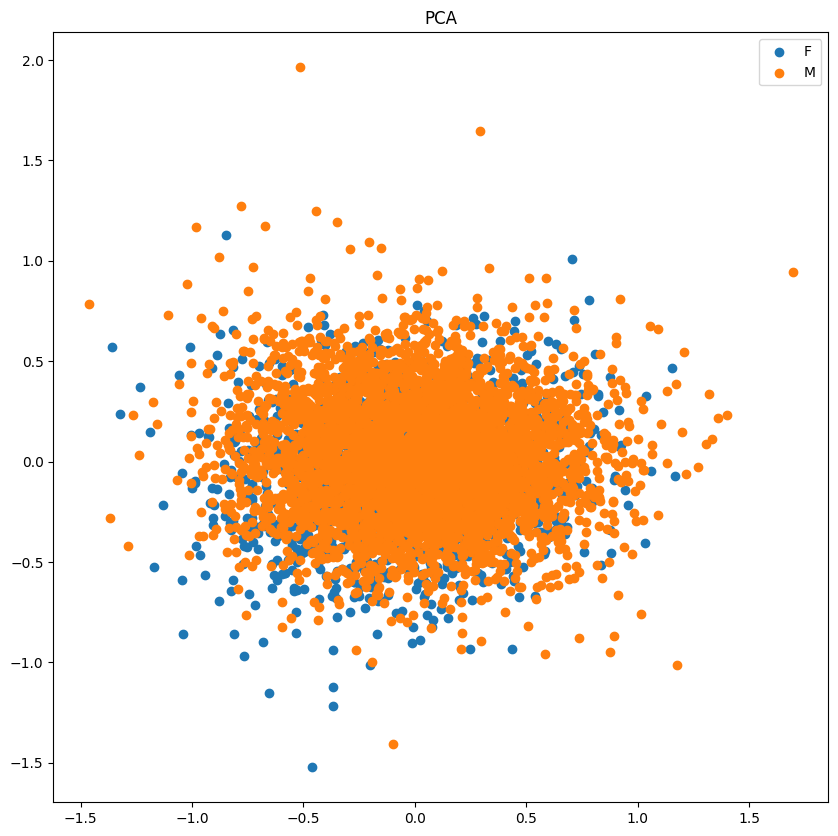

In [57]:
pca = PCA(n_components = 2)
pca_out = pca.fit_transform(user_matrix)
plot_results_users(pca_out,users_df,'Gender',dict_user_df,'PCA')

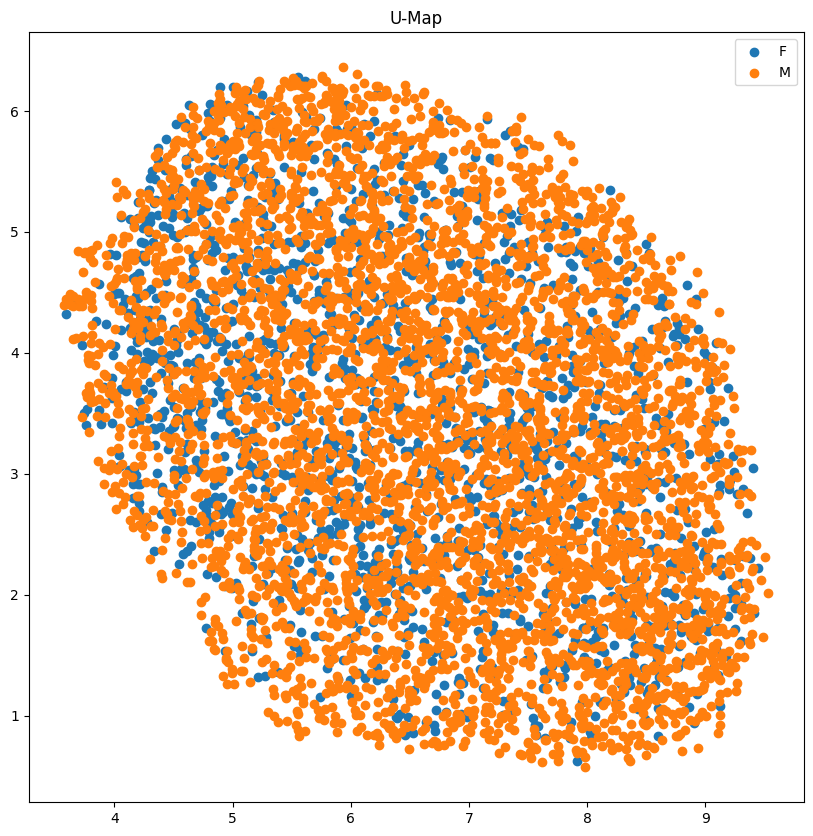

In [58]:
map = umap.UMAP(random_state = 42)
umap_out = map.fit_transform(user_matrix)
plot_results_users(umap_out,users_df,'Gender',dict_user_df,'U-Map')

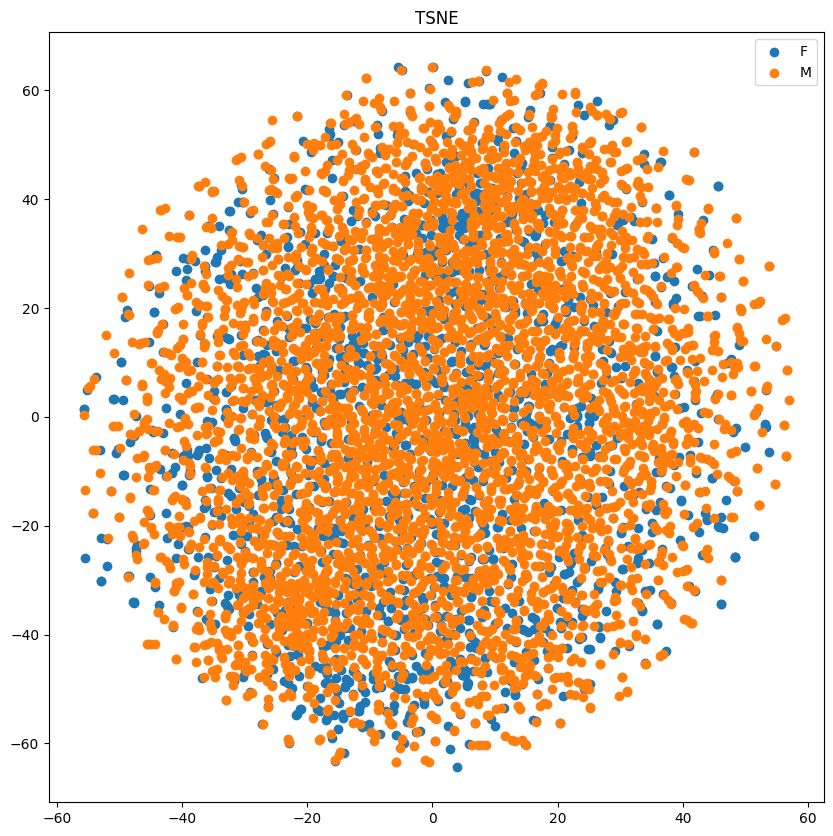

In [59]:
tsne = TSNE(random_state = 42)
tmp_tsne = tsne.fit_transform(user_matrix)
plot_results_users(tmp_tsne,users_df,'Gender',dict_user_df,'TSNE')

### By Age

Plotting by age gives us a similar result to the gender, it is hard to find any distinct clusters between them.

As the are many classes of age in the data set, we also plotted the results of a smaller list of classes which are under the 3 plots for all Age ranges.

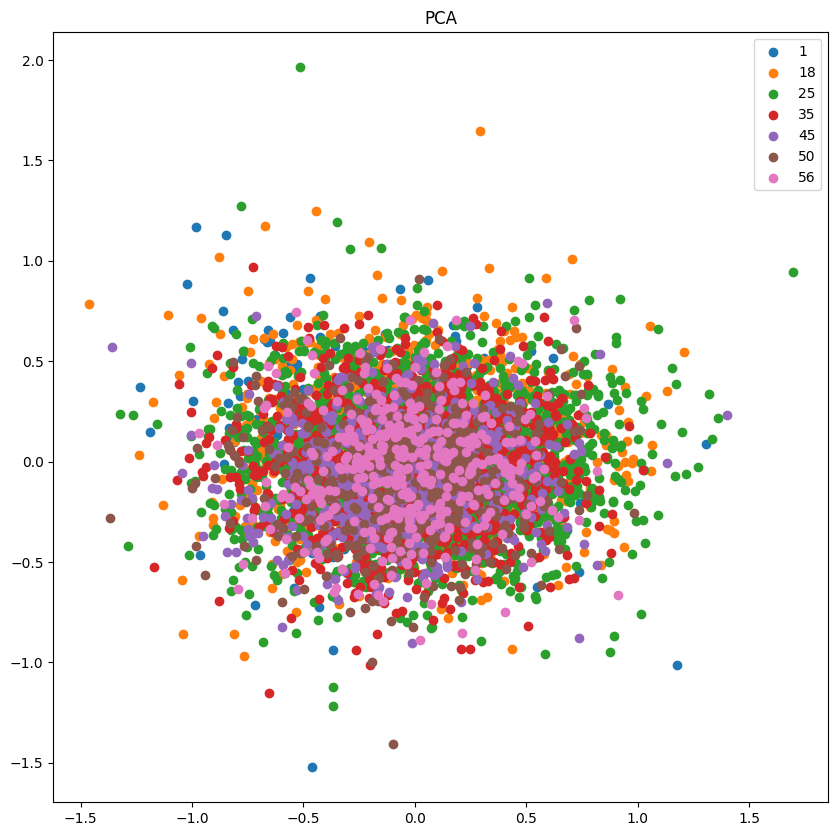

In [61]:
plot_results_users(pca_out,users_df,'Age',dict_user_df,'PCA')

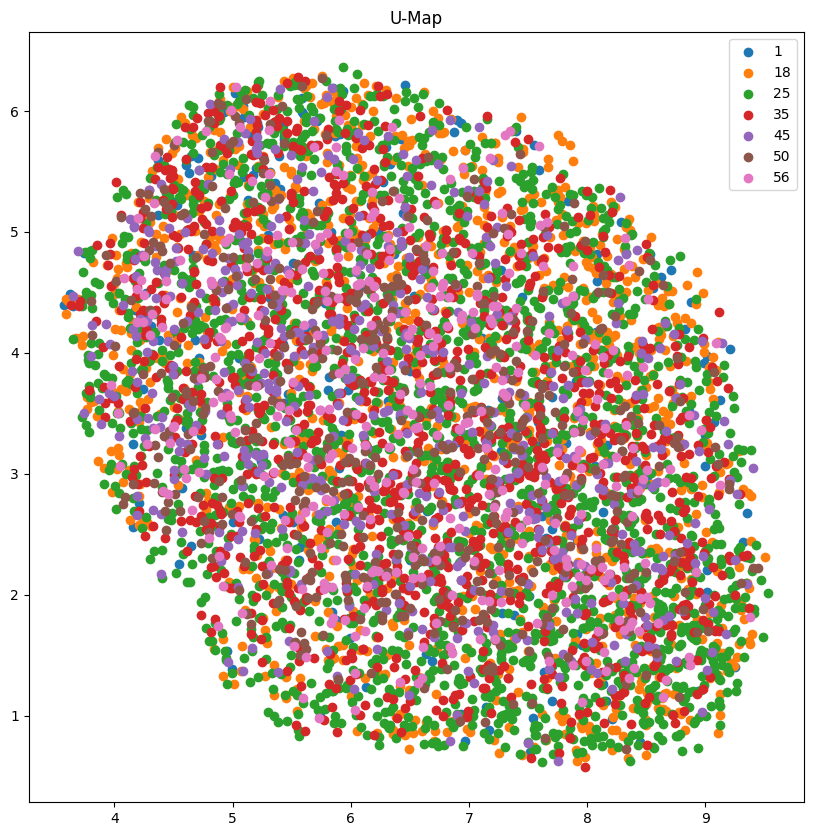

In [42]:
plot_results_users(umap_out,users_df,'Age',dict_user_df,'U-Map')

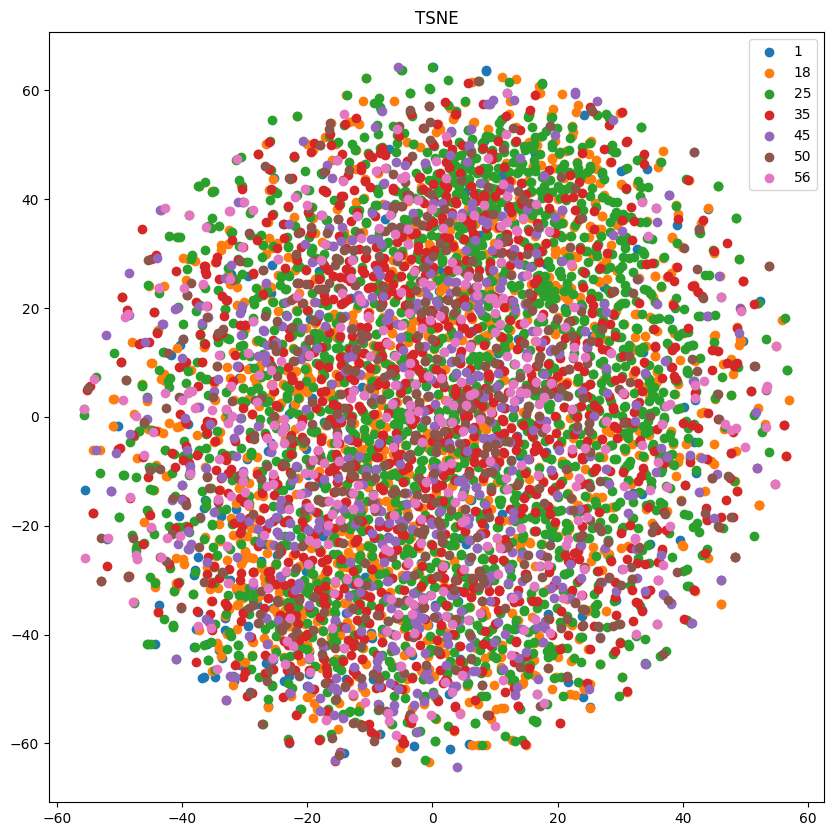

In [43]:
plot_results_users(tmp_tsne,users_df,'Age',dict_user_df,'TSNE')

### By some age values

We were curious wheather the older people rate differently than the younger group, unfortunatly the results are very similar. Although we may find some changes in the density, for example top right part of the TSNE plot, where we have a dense 25 year group, but not so much of the 50 and 56 year old group. But in reality it is hard to tell if we could conclude anything from that, maybe if we had a bigger sample of the 50 and 56 year old groups we would also see more of these points in the cluster on the top right. 

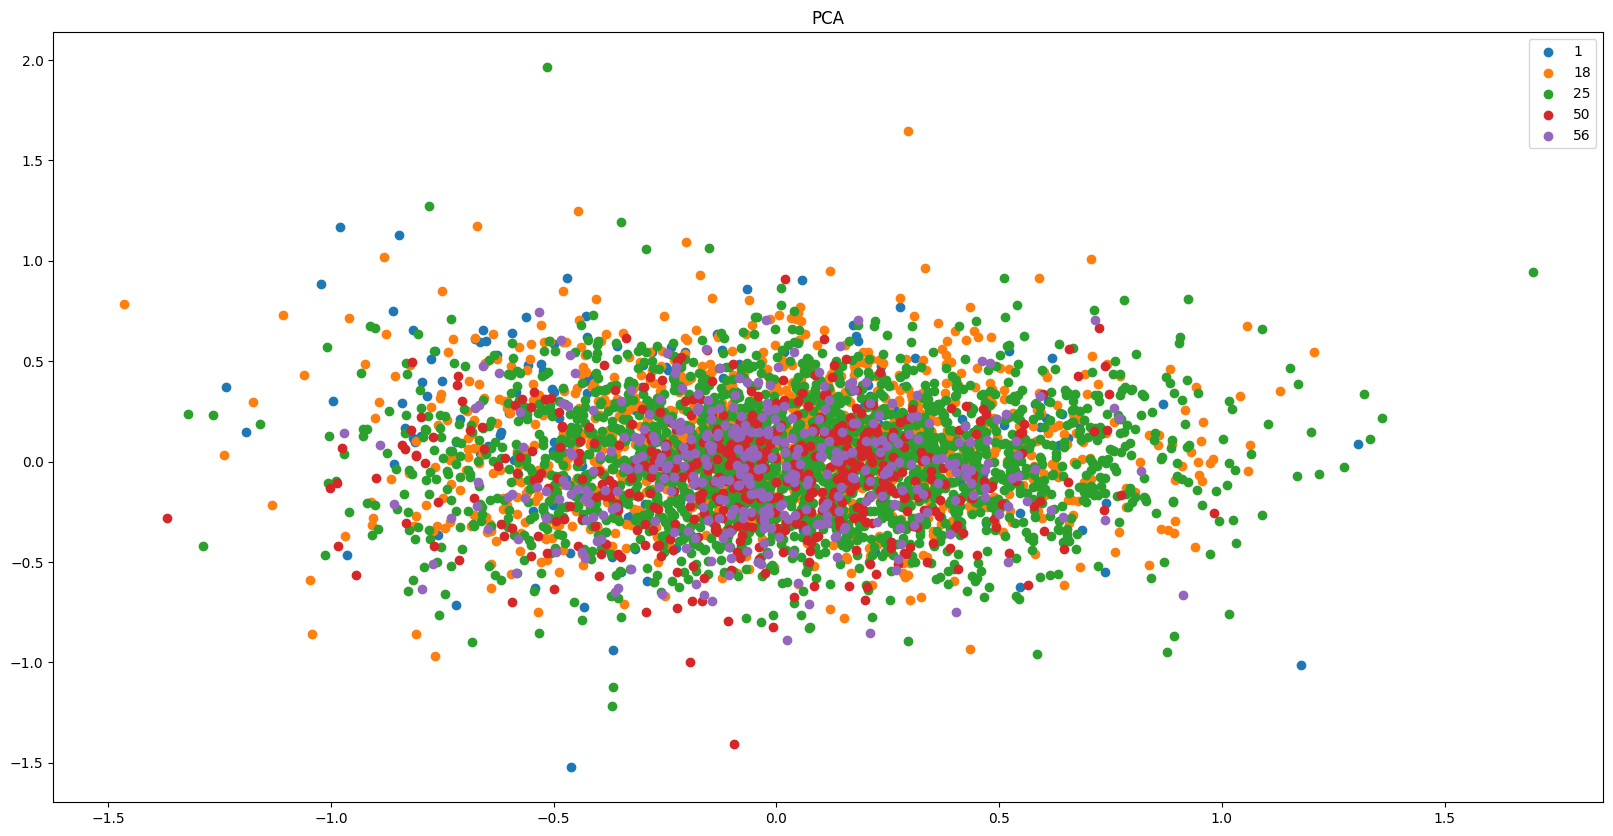

In [65]:
plot_results_users_list(pca_out,users_df,'Age',[1,18,25,50,56],dict_user_df,'PCA')

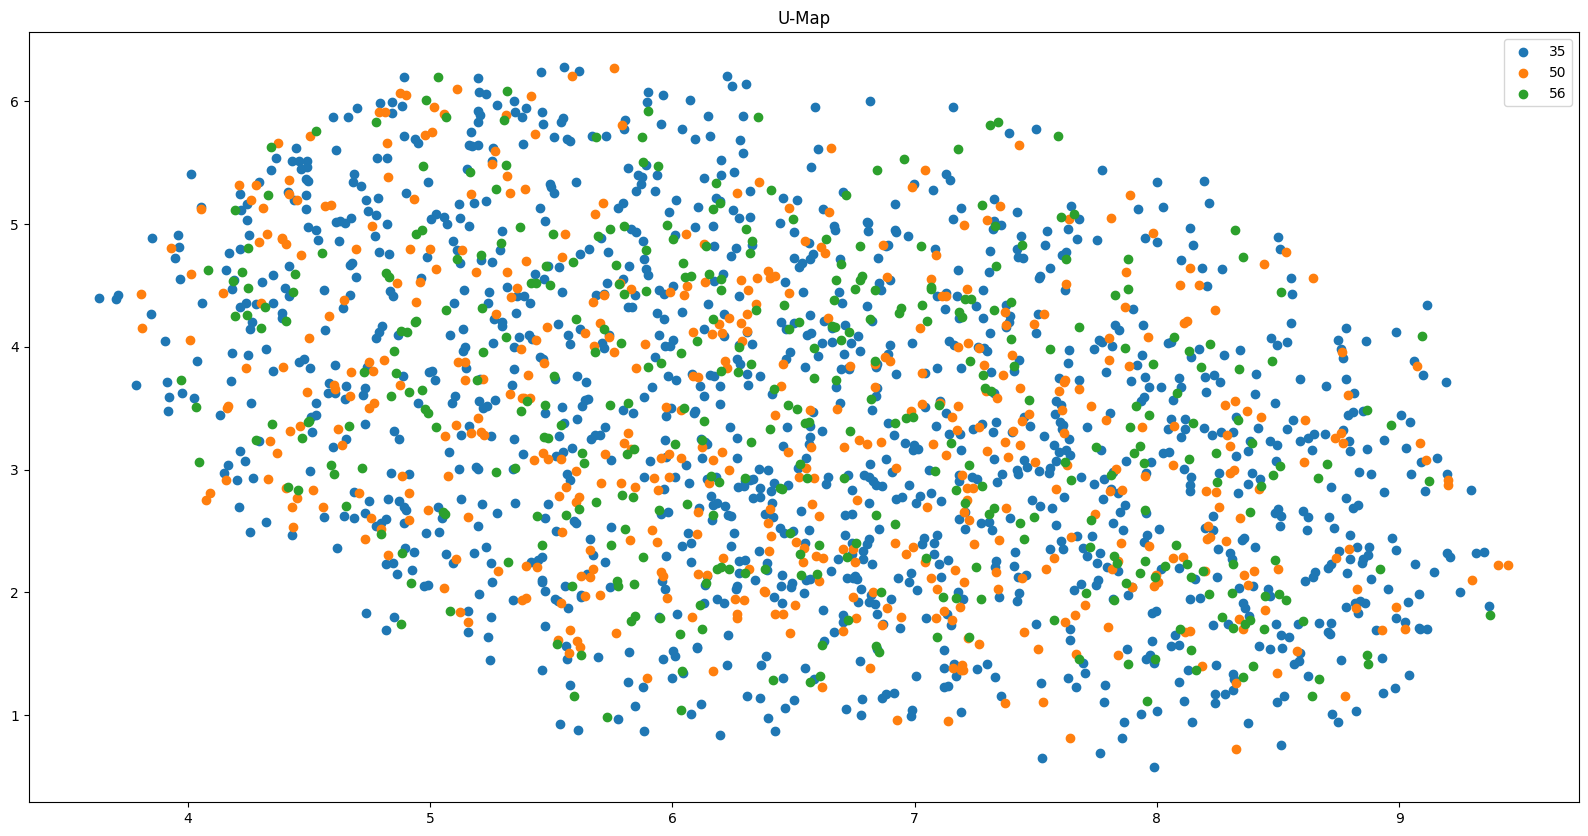

In [71]:
plot_results_users_list(umap_out,users_df,'Age',[35,50,56],dict_user_df,'U-Map')

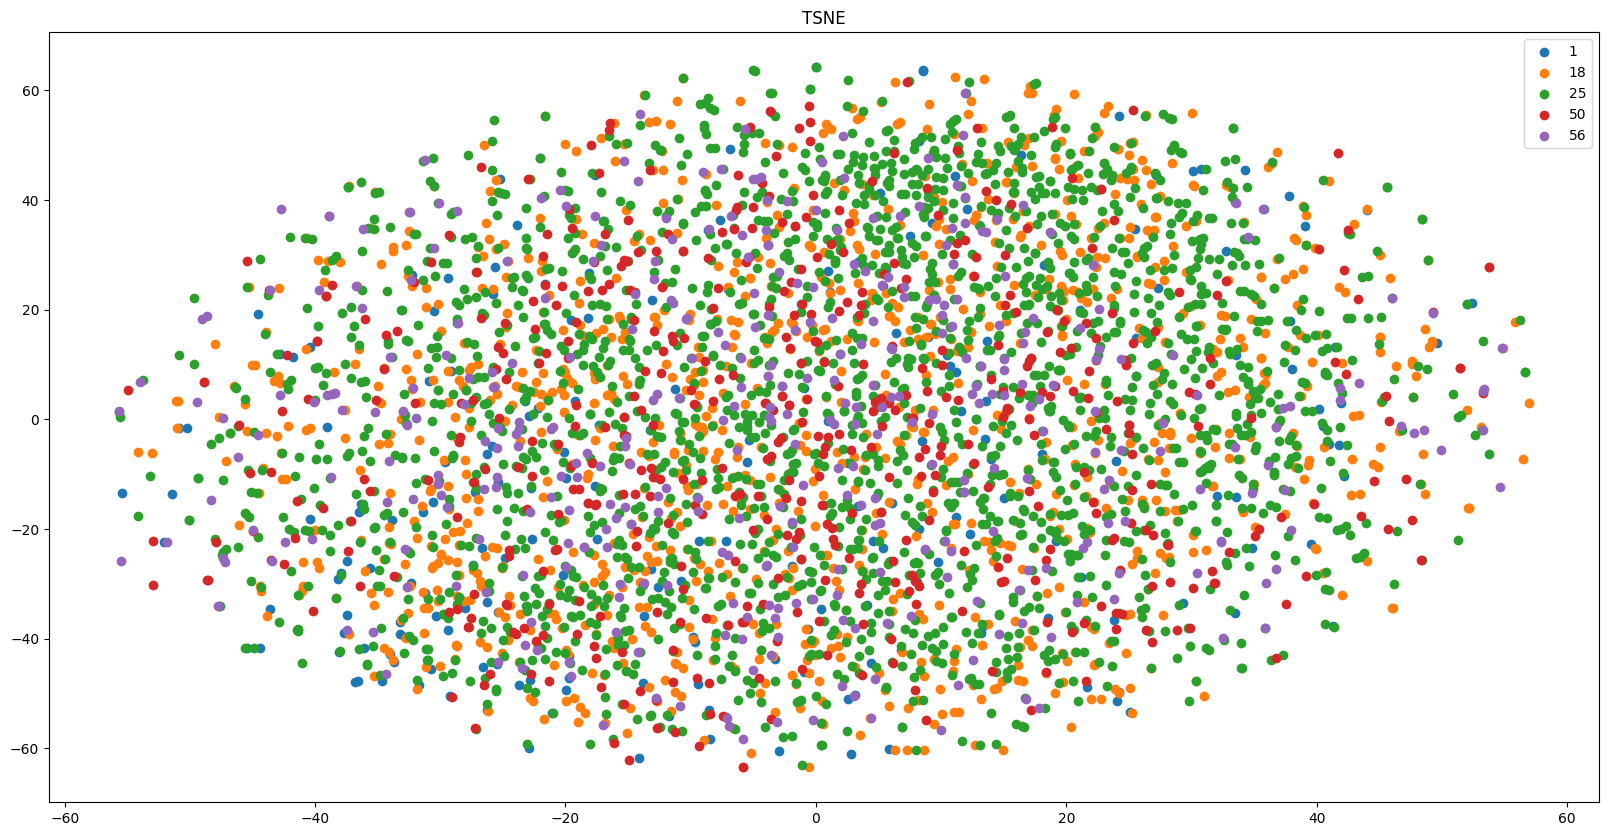

In [67]:
plot_results_users_list(tmp_tsne,users_df,'Age',[1,18,25,50,56],dict_user_df,'TSNE')

# Movie results

Now we run the plotting results of dimension reduction on movie matrixes

### By Genre

Firstly we plot by all genres (to be more precise the first genre that apears in a series of genres stated in the data set for a specific movie). 

The results are hard to read, as there are a lot of different classes and the colours blend in, so we plotted by just some of the genres (the results are below these 3 graphs)

We still can look for some clusters, for example, the action movies in the U-Map algorithm plot are more dens near the bottom left of the plot, while horror movies aren't very present there. Horror movies can be find in the top right where in this case the action films are not so dense. We can also see the green cluster at the bottom, which is the animation genre.

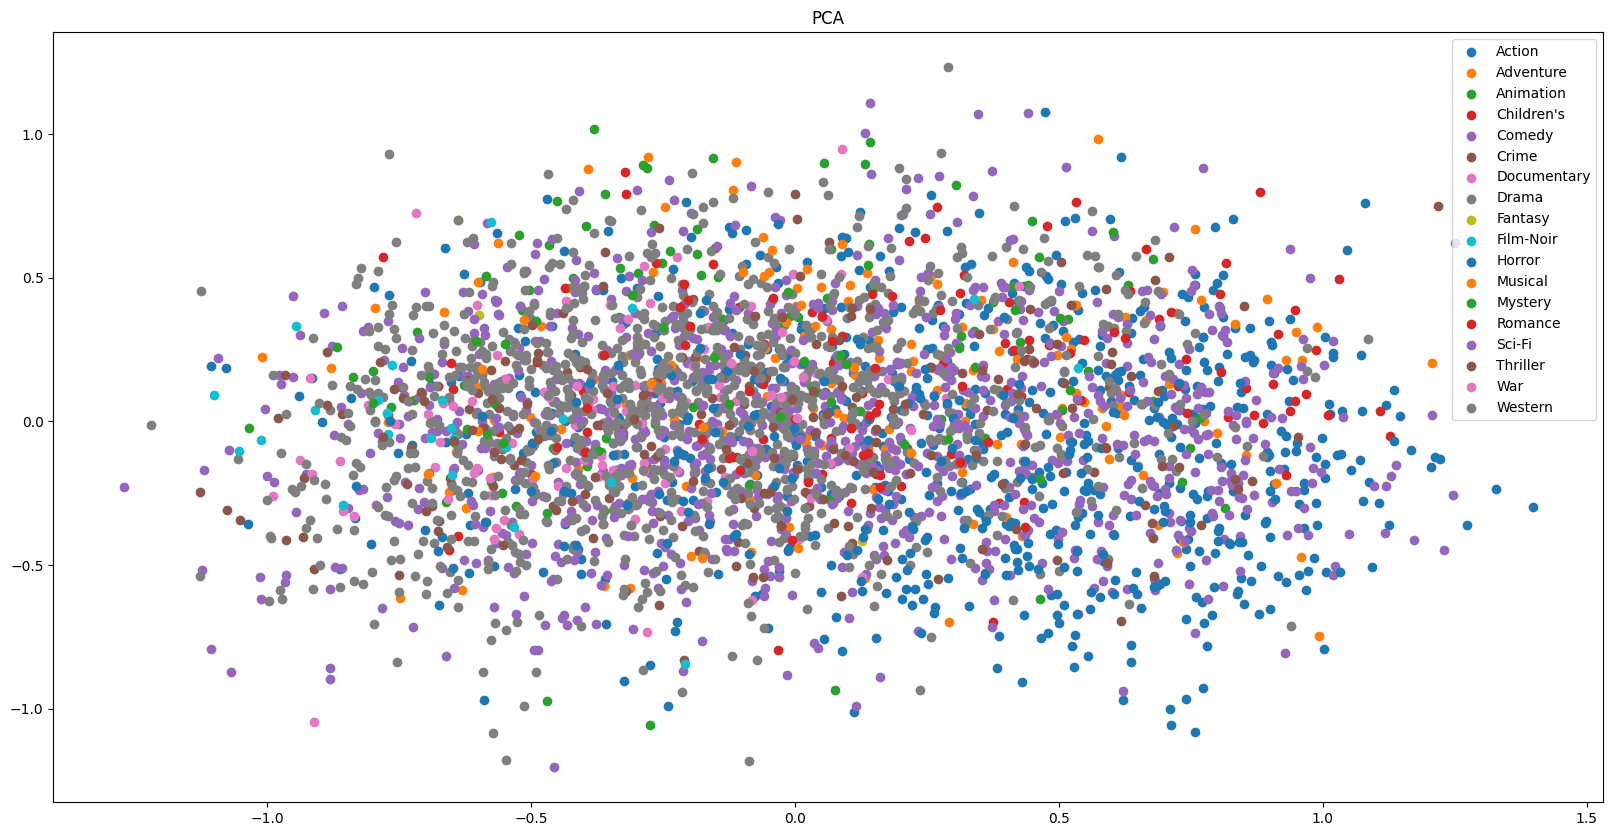

In [46]:
pca = PCA(n_components = 2)
pca_out = pca.fit_transform(item_matrix)
plot_results_movies(pca_out,movies_df,'genre_1',dict_movie_df,'PCA')

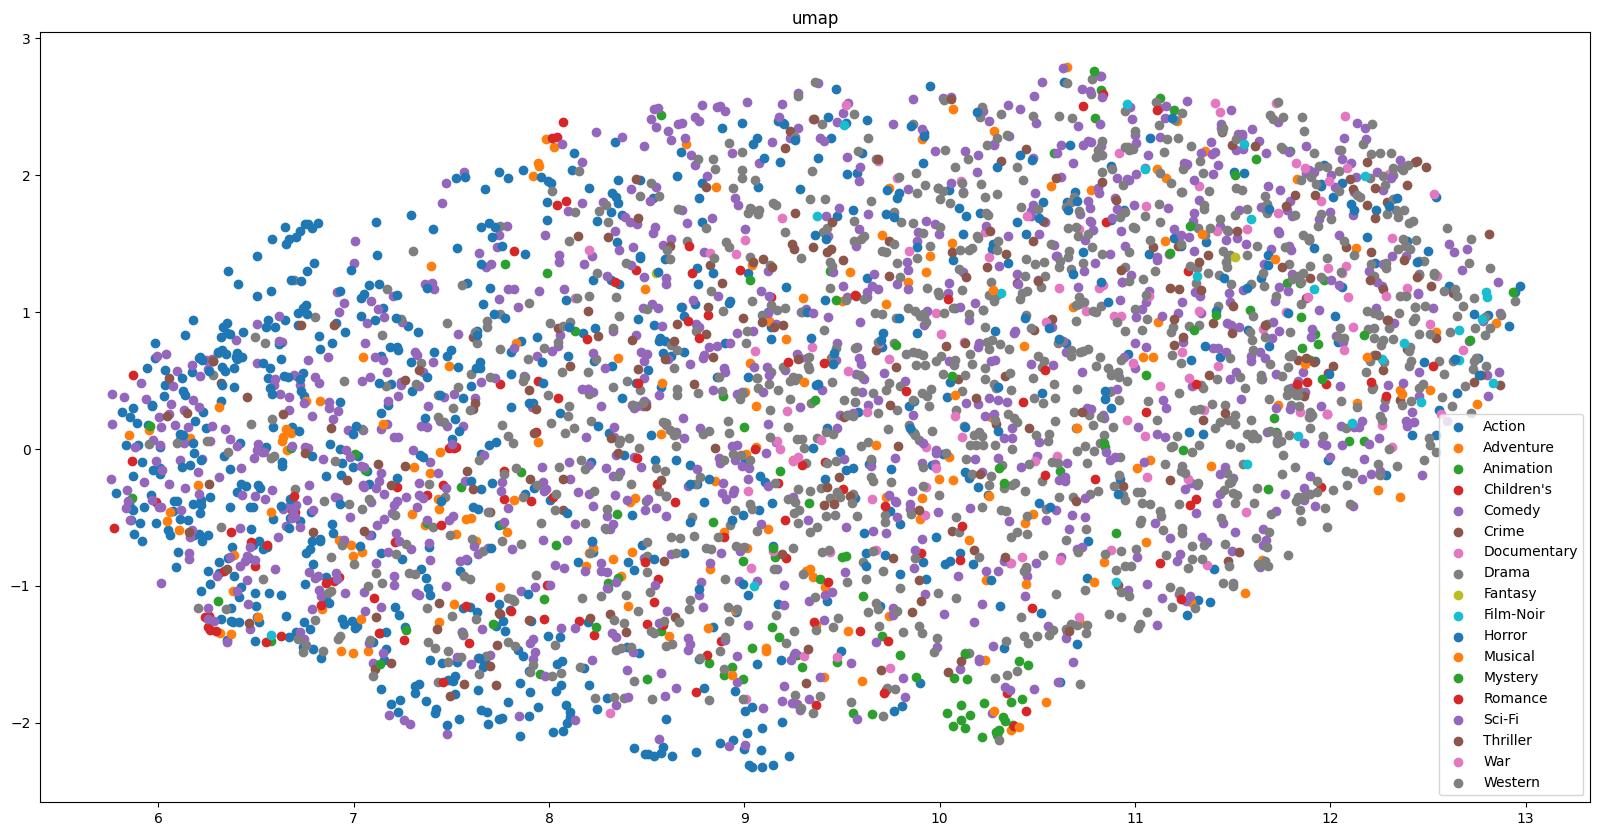

In [47]:
map = umap.UMAP(random_state = 42)
umap_out = map.fit_transform(item_matrix)
plot_results_movies(umap_out,movies_df,'genre_1',dict_movie_df,'umap')

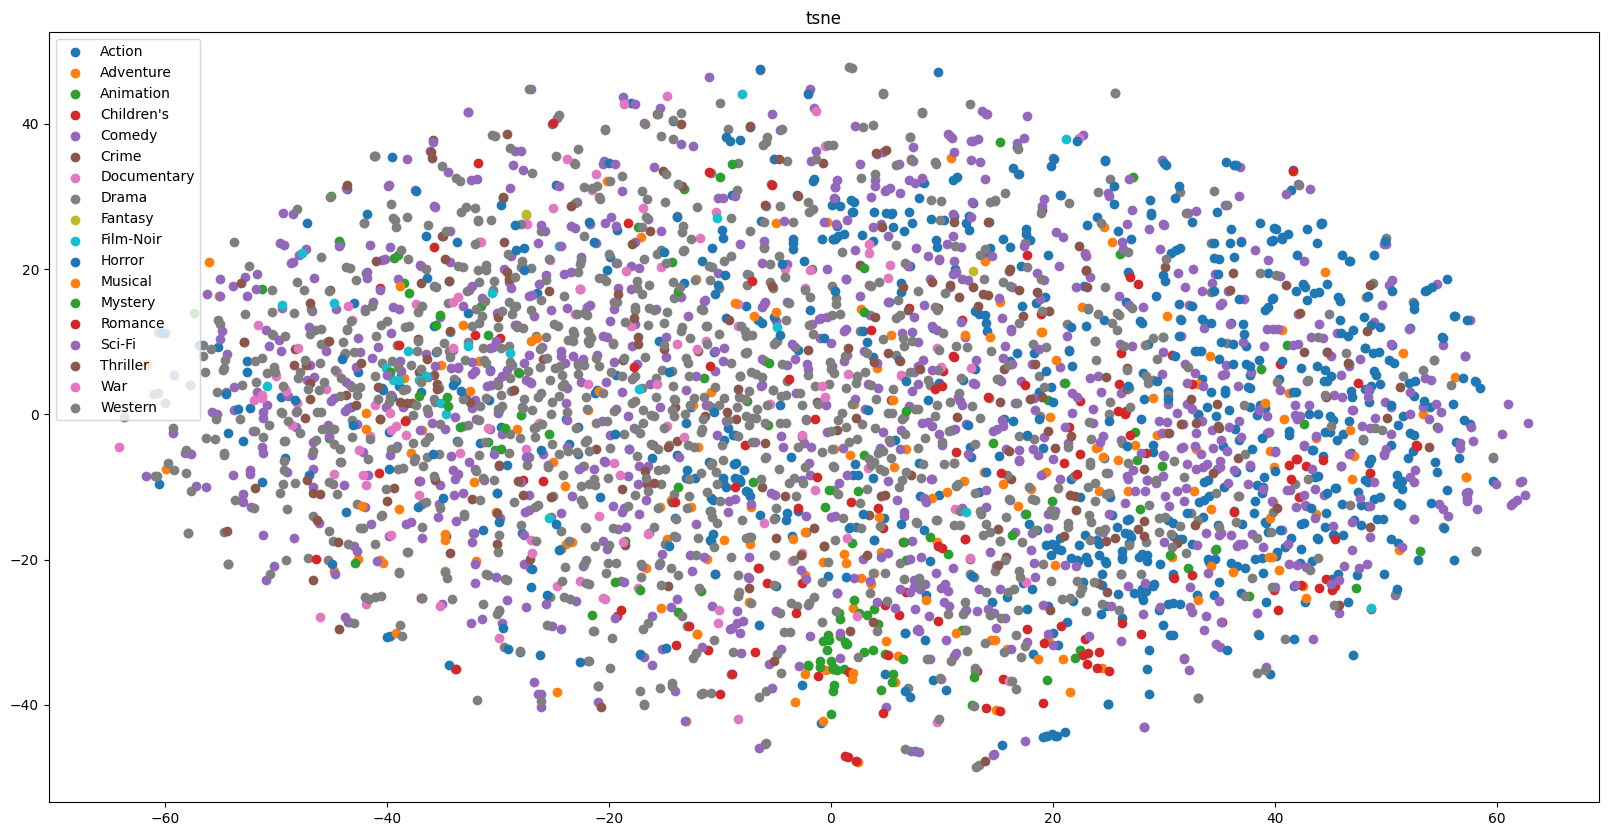

In [48]:
tsne = TSNE(random_state = 42)
tmp_tsne = tsne.fit_transform(item_matrix)
plot_results_movies(tmp_tsne,movies_df,'genre_1',dict_movie_df,'tsne')

### By a list of genres

To better see the results we used just some of the genres. Here the clusters are more distinct.

In all of the algorithms we can see that Horror movies tend to be in a more seperated spot, that may give an impression that people treat them differently than the other genres of films.

Another intresting result is the animation and Children's group, in the TSNE algorithm they are clustered and close to each other, similar although not so distinct situation happnes in the U-Map plot.

The other intresting fact is that we can see that some genres tend to be present in one place, and nearly absent in the other regions. As the examples above, or Documentary films, Musical films. We may conclude that the reason is that all of these genres may be targeted to a specific group, and people either love them or hate them which makes them more distinct in the rating proces. There are also films that are more spread-out, like Drama films from the plots above, or Crime films in algorithms below. They are not so distinct which may suggest that their target group is much bigger. At least that is our hypothesis.

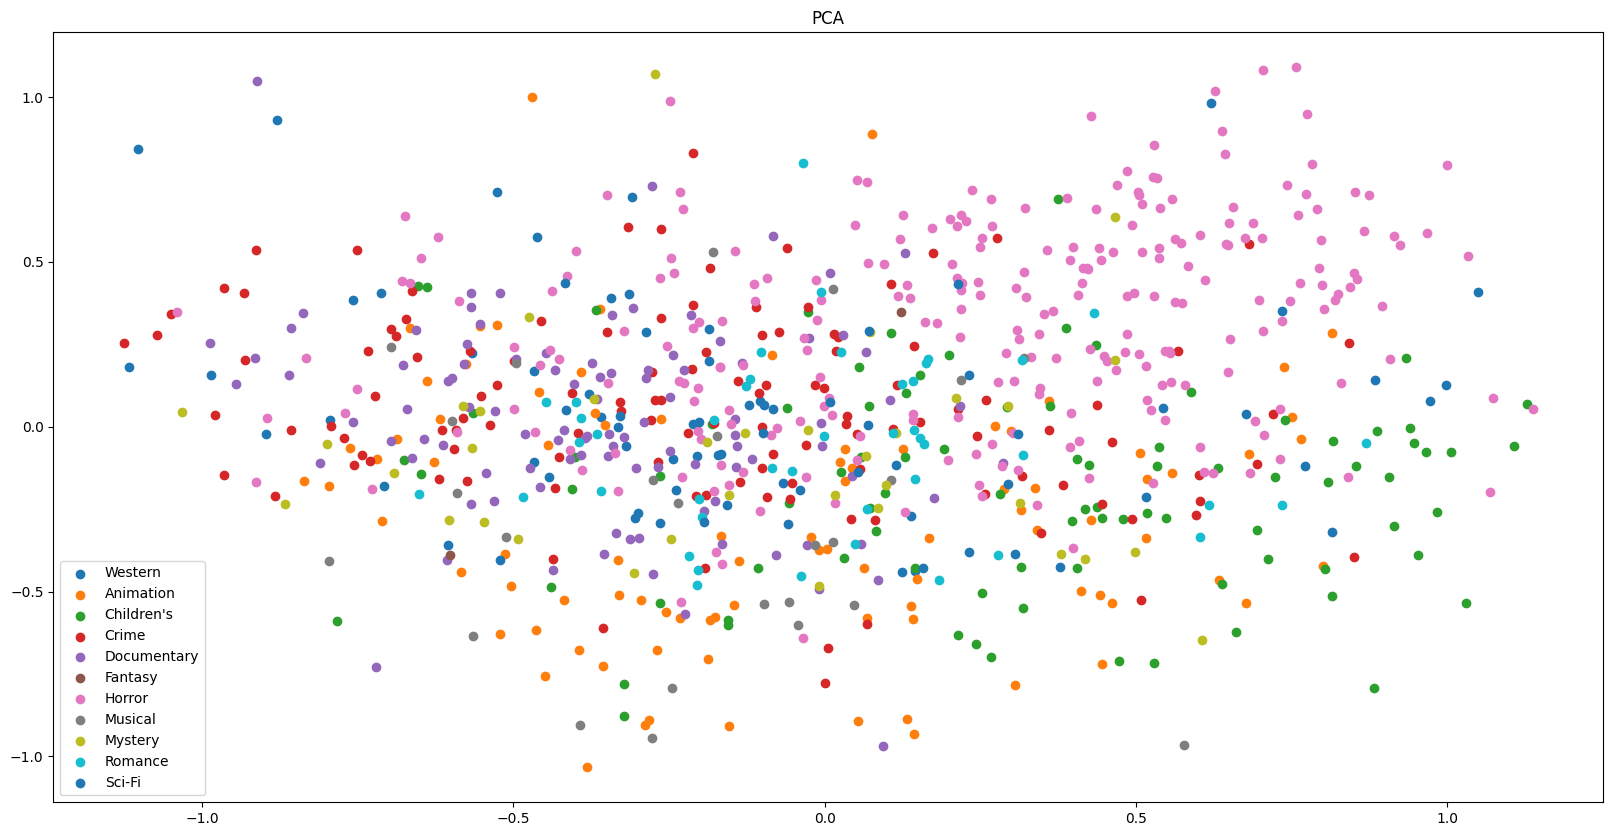

In [55]:
pca = PCA(n_components = 2)
pca_out = pca.fit_transform(item_matrix)
plot_results_movies_list(pca_out,movies_df,'genre_1',['Western', 'Animation', "Children's",'Crime', 'Documentary', 'Fantasy', 'Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi'],dict_movie_df,'PCA')

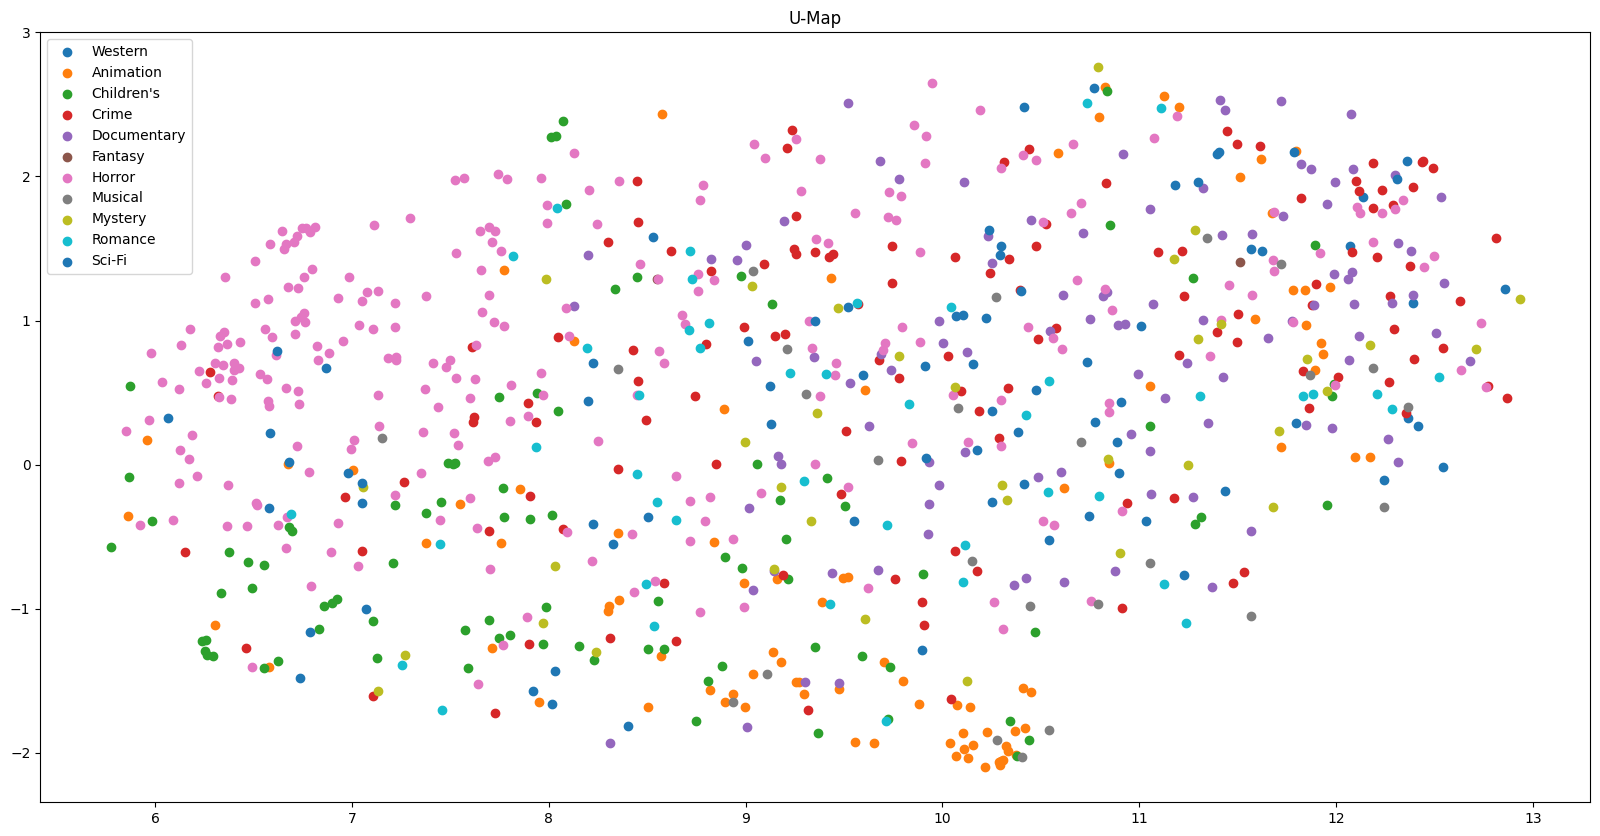

In [54]:
map = umap.UMAP(random_state = 42)
umap_out = map.fit_transform(item_matrix)
plot_results_movies_list(umap_out,movies_df,'genre_1',['Western', 'Animation', "Children's",'Crime', 'Documentary', 'Fantasy', 'Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi'],dict_movie_df,'U-Map')

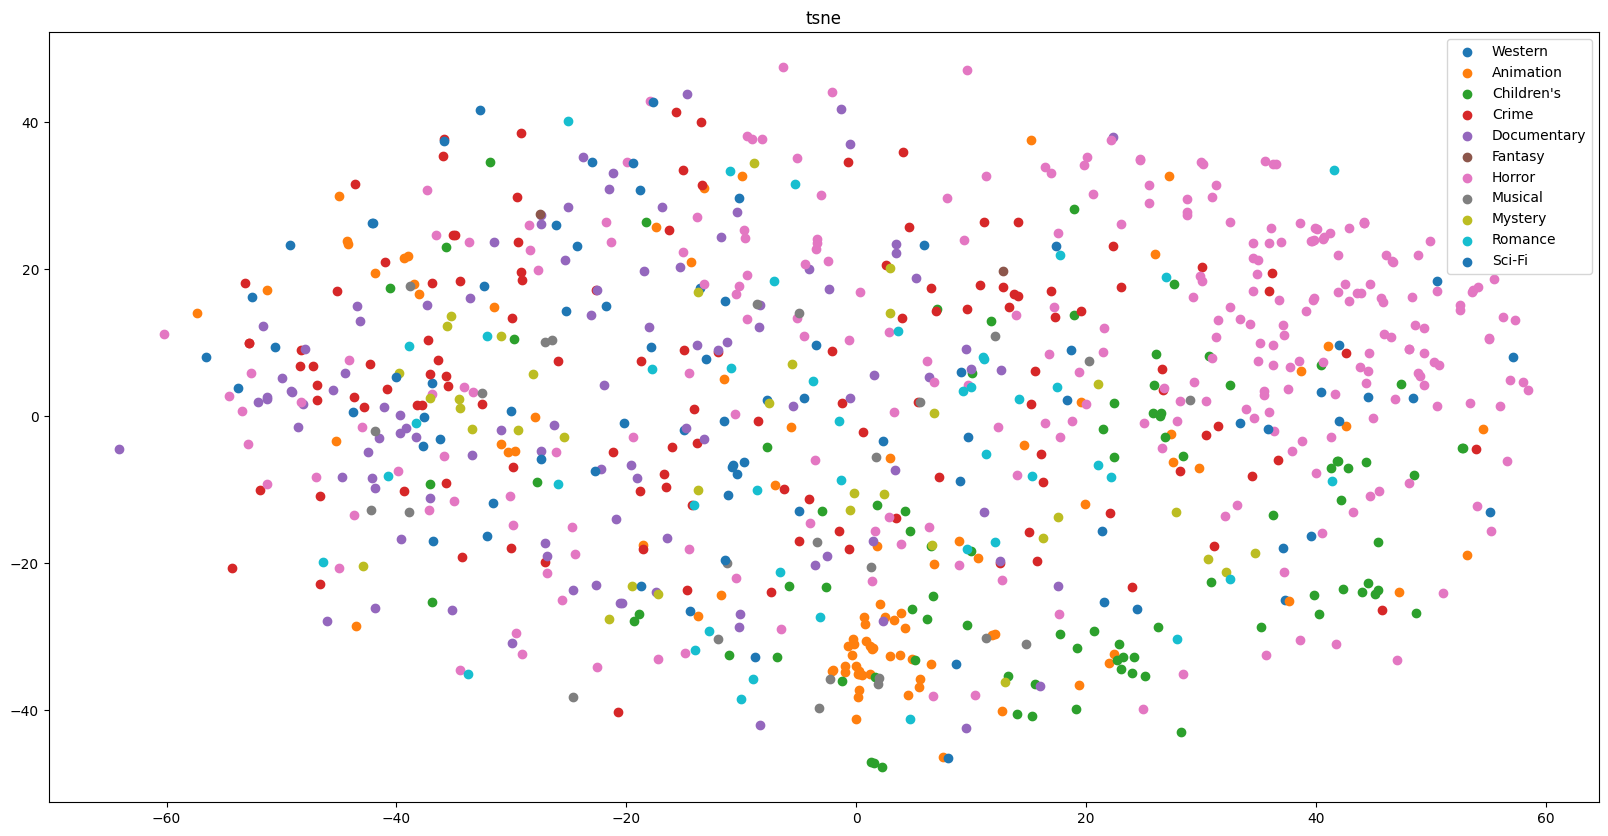

In [53]:
tsne = TSNE(random_state = 42)
tmp_tsne = tsne.fit_transform(item_matrix)
plot_results_movies_list(tmp_tsne,movies_df,'genre_1',['Western', 'Animation', "Children's",'Crime', 'Documentary', 'Fantasy', 'Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi'],dict_movie_df,'tsne')

## Conclusion

All in all the visualization of the matrixes used in the MatrixFactorization algorithm gives us a very interesting insight into the data set of the movies and users. The fact that the genres of movies can create clusters after a dimension reduction, and the fact that Gender is a relatively not very important factor when it comes to movie ratings tendecies.

